**Import necessary modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics

**Importing data**

In [2]:
data=pd.read_csv("../input/data.csv",header=0)
print(data.head(2))

       id diagnosis     ...       fractal_dimension_worst  Unnamed: 32
0  842302         M     ...                       0.11890          NaN
1  842517         M     ...                       0.08902          NaN

[2 rows x 33 columns]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Now we can see Unnamed:32 have 0 non null object it means the all values are null in this column so we cannot use this column for our analysis, therefore, we drop those columns.

In [4]:
data.drop("Unnamed: 32",axis=1,inplace=True)

In [5]:
data.drop("id",axis=1,inplace=True)

Here, we divided the data into three categories.

In [6]:
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])

In [7]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Getting into the data and exploring the aspects**

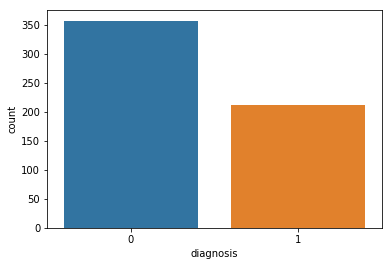

In [8]:
sns.countplot(data['diagnosis'],label="Count")

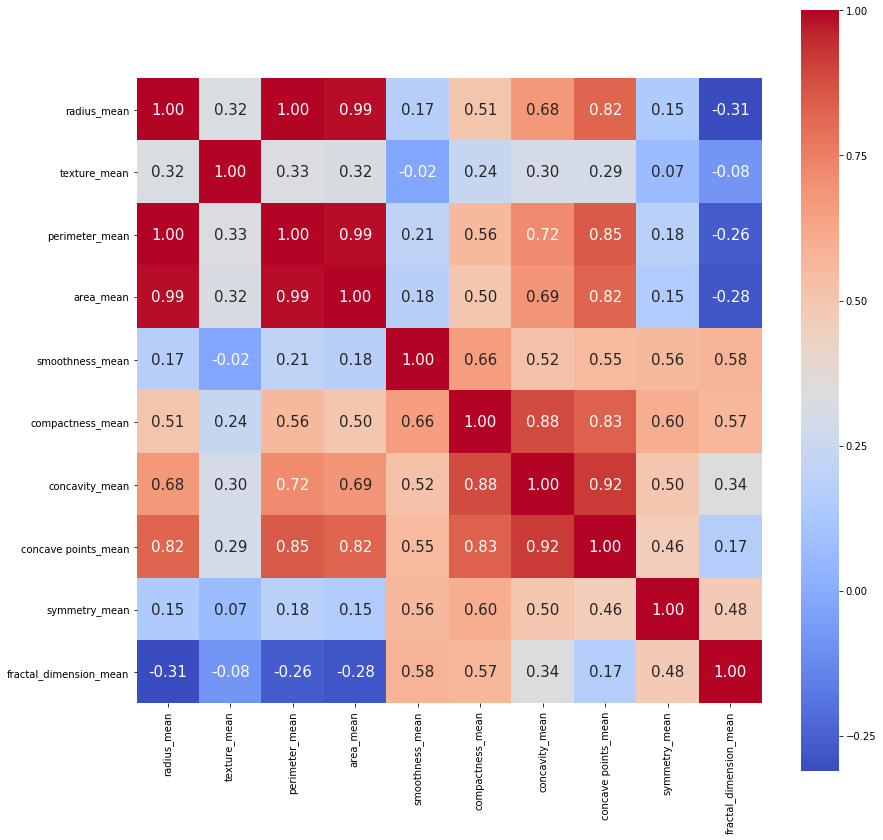

In [9]:
corr=data[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,cbar=True,square=True,annot=True,fmt='.2f',annot_kws={'size': 15},xticklabels=features_mean,yticklabels=features_mean,cmap='coolwarm')

**Observation:**

* Radius,parameter and area are highly correlated as expected from their relation, therefore we use any one of them.
* Compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here.
* Therefore,the selected parameter for use is perimeter_mean, texture_mean, compactness_mean and symmetry_mean. 

In [10]:
prediction_var=['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
train,test=train_test_split(data,test_size=0.3)

In [11]:
#Splitting the data into train and test.
train_X=train[prediction_var]
train_y=train.diagnosis
test_X=test[prediction_var]
test_y=test.diagnosis

In [12]:
model=RandomForestClassifier(n_estimators=100)

In [13]:
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
prediction=model.predict(test_X)

In [15]:
metrics.accuracy_score(prediction,test_y)

0.9532163742690059

**Now we try with Support Vector Machine Algorithm  **

In [16]:
model=svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8947368421052632

**SVM is giving only 0.8538 which we can improve by using different techniques, we will get the overview of Machine Learning**
Now we will for all feature_mean, where we will get the important features using Random Forest Classifier

In [17]:
prediction_var=features_mean #with all features

In [18]:
train_X=train[prediction_var]
train_y=train.diagnosis
test_X=test[prediction_var]
test_y=test.diagnosis

In [19]:
model=RandomForestClassifier(n_estimators=100)

In [20]:
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9532163742690059

* Taking all features in consideration, accuracy increased but not so much so according to Razor's rule.
* Let's check the important features in the prediction.

In [21]:
featimp=pd.Series(model.feature_importances_,index=prediction_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.311534
radius_mean               0.140429
perimeter_mean            0.131047
concavity_mean            0.121133
area_mean                 0.120678
texture_mean              0.064748
compactness_mean          0.048678
smoothness_mean           0.028637
fractal_dimension_mean    0.016640
symmetry_mean             0.016476
dtype: float64


**Let's do it first using Support Vector Machine Algorithm(SVM) **

In [22]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7368421052631579

We can observe that accuracy has dropped down while using SVM, then we'll take only important features using Random Forest Classifier

In [23]:
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']      

In [24]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [25]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.935672514619883

In [26]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8362573099415205

 We observe that multi collinearity effecting our SVM part a lot.
 Converslely, it is not affecting so much of Random Forest because for random forest we don't need to make so much effort for our analysis part.
 
 Now, we have to deal with the worst part of the data, let's start with features_worst

In [27]:
prediction_var=features_worst

In [28]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [29]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7017543859649122

Same problem will continue ith SVM, as we observe low accuracy, therefore we will ture it's parameters.
Again, we will extract out the important features using Random Forest Classifier 

In [30]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9532163742690059

**Getting important features**

In [31]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

perimeter_worst            0.267371
area_worst                 0.184756
concave points_worst       0.179239
radius_worst               0.158728
concavity_worst            0.073994
texture_worst              0.040409
smoothness_worst           0.031603
compactness_worst          0.028157
symmetry_worst             0.018414
fractal_dimension_worst    0.017329
dtype: float64


**Let's take top five features**

In [32]:
prediction_var = ['concave points_worst','radius_worst','area_worst','perimeter_worst','concavity_worst'] 

In [33]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [34]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.935672514619883

In [35]:
#check for SVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7076023391812866

As per the consistency and simplicity, we will use Random Forest Classifier for prediction.

From the feature mean, we will indentify the variables which can be used for the classification the two class of the cancer. Therefore, we will plot a scatter plot from where we can visualise the distinguishable boundary between the two class of the cancer.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


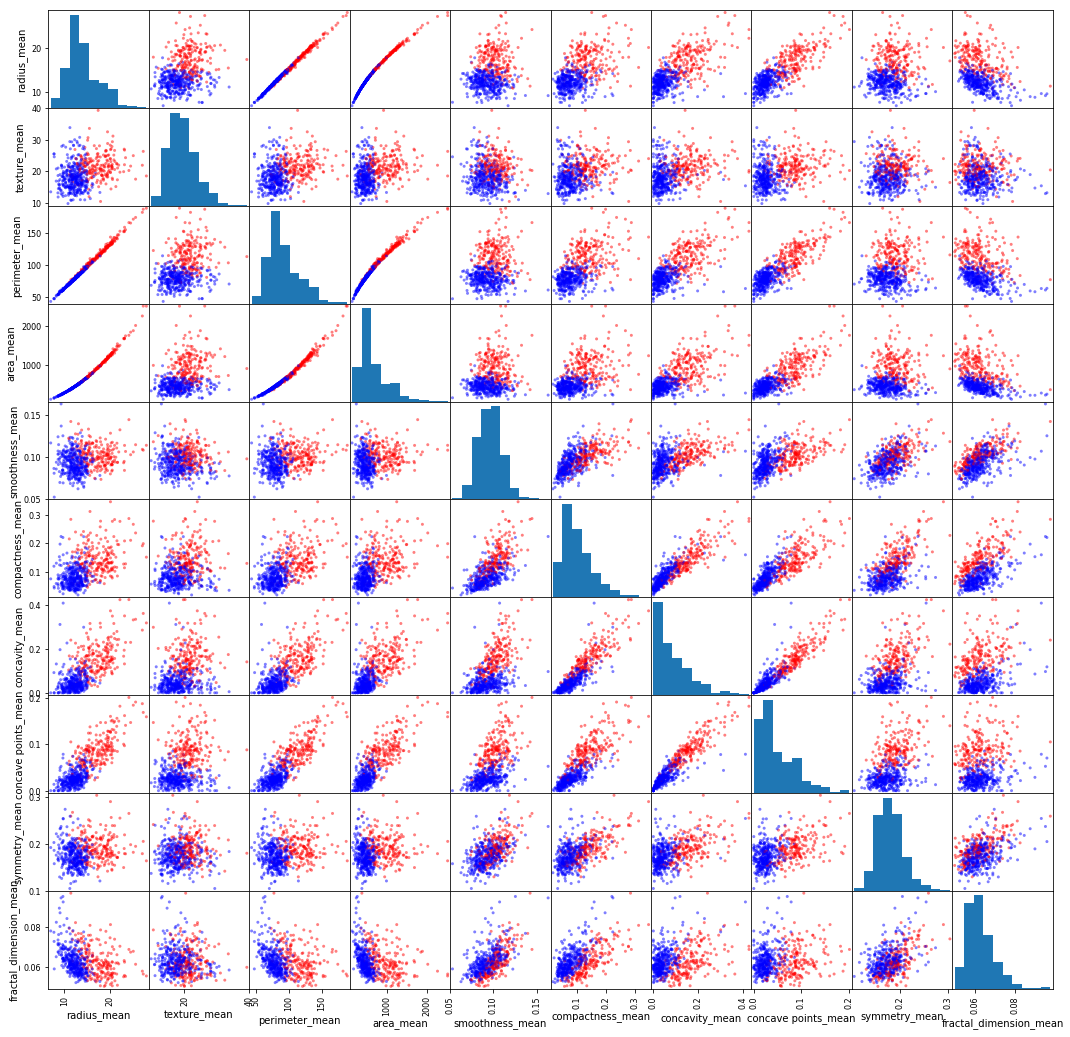

In [36]:
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (18, 18)); # plotting scatter plot matrix

**Observation from the above scatter plot**

Radius, area and perimeter have a strong linear correlation as expected and the above scatter plot shows the features texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean can't be used for distinguishing the two class of the cancer because both classes are scattered and mixed within and there is no distinguishable plane.

There we remove them from our prediction_var.

In [37]:
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [38]:
predict_var=['radius_mean','perimeter_mean','compactness_mean','area_mean','concave points_mean']

In [39]:
#Checking the accuracy of the model
def model(model,data,prediction,outcome):
    kf=KFold(n_splits=10)

In [40]:
#Cross validation using different model
def classification_model(model,data,prediction_input,output):
    model.fit(data[prediction_input],data[output]) 
    predictions = model.predict(data[prediction_input])
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    kf = KFold(n_splits=10,random_state=42,shuffle=False)
    error = []
    for train, test in kf.split(data):
        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
        
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

**Now, we will use different models, using the concept of Machine Learning.**
* We will compute the accuracy of the each model along with the algorithm with cross validation, for the approval of the consideration of the model.

In [41]:
model = DecisionTreeClassifier()
predict_var=['radius_mean','perimeter_mean','compactness_mean','area_mean','concave points_mean']
outcome_var= "diagnosis"
classification_model(model,data,prediction_var,outcome_var)


Accuracy : 100.000%
Cross-Validation Score : 85.965%
Cross-Validation Score : 86.842%
Cross-Validation Score : 88.304%
Cross-Validation Score : 89.035%
Cross-Validation Score : 89.825%
Cross-Validation Score : 90.351%
Cross-Validation Score : 90.977%
Cross-Validation Score : 91.228%
Cross-Validation Score : 90.838%
Cross-Validation Score : 91.576%


Since, we observe that the model is overfitting as it's accuracy is 100%, moreover the cross-validation scores are not good, so accuracy cannot be considered is this senario.

In [42]:
model = svm.SVC()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 98.946%
Cross-Validation Score : 26.316%
Cross-Validation Score : 46.491%
Cross-Validation Score : 52.047%
Cross-Validation Score : 53.947%


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Cross-Validation Score : 55.789%
Cross-Validation Score : 59.942%
Cross-Validation Score : 61.905%
Cross-Validation Score : 63.816%
Cross-Validation Score : 65.692%
Cross-Validation Score : 66.623%


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [43]:
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 92.443%
Cross-Validation Score : 75.439%
Cross-Validation Score : 82.456%
Cross-Validation Score : 83.626%
Cross-Validation Score : 85.088%
Cross-Validation Score : 86.667%
Cross-Validation Score : 88.012%
Cross-Validation Score : 88.471%
Cross-Validation Score : 89.035%
Cross-Validation Score : 88.694%
Cross-Validation Score : 89.289%


Again, the cross-validation scores are not good.

In [44]:
model = RandomForestClassifier(n_estimators=100)
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 89.474%
Cross-Validation Score : 88.596%
Cross-Validation Score : 89.474%
Cross-Validation Score : 90.789%
Cross-Validation Score : 91.930%
Cross-Validation Score : 92.105%
Cross-Validation Score : 92.732%
Cross-Validation Score : 93.202%
Cross-Validation Score : 93.177%
Cross-Validation Score : 93.503%


**Here, we can observe that RandomForestClassifier have good cross-validation score.**

In [45]:
model=LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 92.794%
Cross-Validation Score : 78.947%
Cross-Validation Score : 85.088%
Cross-Validation Score : 87.135%
Cross-Validation Score : 88.158%
Cross-Validation Score : 89.474%
Cross-Validation Score : 90.643%
Cross-Validation Score : 91.228%
Cross-Validation Score : 91.667%
Cross-Validation Score : 91.423%
Cross-Validation Score : 91.924%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Above, we compared the different models of Machine Learning and extract out the better one of them.
**Now, we will tune the parameters for the different models**

Tuning parameters using GridSearchCV for every model used.

In [46]:
data_X=data[prediction_var]
data_y=data['diagnosis']


In [47]:
#GridSearchCV function
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    clf.fit(train_X,train_y)
    print("The efficient parameter to be used is")
    print(clf.best_params_)
    print("the efficient estimator is ")
    print(clf.best_estimator_)
    print("The efficient score is ")
    print(clf.best_score_)

In [48]:
#Here, we have to use the parameters which we used in Decision Tree Classifier
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The efficient parameter to be used is
{'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 3}
the efficient estimator is 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
The efficient score is 
0.9422110552763819


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [49]:
#Here, we wil use the parameters use in KNN
model = KNeighborsClassifier()
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The efficient parameter to be used is
{'leaf_size': 1, 'n_neighbors': 8, 'weights': 'uniform'}
the efficient estimator is 
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')
The efficient score is 
0.9120603015075377


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [50]:
#Here, we try it with SVM 
model=svm.SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The efficient parameter to be used is
{'C': 1000, 'kernel': 'linear'}
the efficient estimator is 
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The efficient score is 
0.9396984924623115


**Conclusion:**

The SVM was initally giving bad accuracy which was improved after tuning the parameters, there we understand the importance of classifier.